In [18]:
#import relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data

# Specify the path to the text file
current_directory = os.getcwd()
file_1 = current_directory +'/1.txt'
file_2 = current_directory +'/2.txt'
file_3 = current_directory +'/3.txt'

    

In [4]:
#read the files

def read_files(file_path):
    # Read all lines from the text file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Initialize an empty list to store rows of data
    data_list = []

    # Assuming 'lines' is a list of strings where each string is a line of data
    if lines:  # Ensure lines is not empty
        for line in lines:
            # Initialize data_dict inside the loop for each line
            data_dict = {}
            try:
                data_dict['facility_name'] = line.split('|')[1].strip()
                data_dict['db_name'] = line.split('|')[3].strip()
                data_dict['file_size'] = line.split('|')[4].split(':')[1].strip()
                data_dict['site_id'] = line.split('|')[5].split(':')[1].strip()
                data_dict['status'] = line.split('|')[6].split(':')[1].strip()
            except IndexError:
                print(f"Line format error: {line}")
                continue  # Skip this line if the format is incorrect

            # Append the dictionary (row) to the list
            data_list.append(data_dict)

        # Convert the list of dictionaries to a DataFrame
        df = pd.DataFrame(data_list, columns=['facility_name', 'db_name', 'file_size', 'site_id', 'status'])

        
    else:
        print("No data found in lines")
    
    return df

In [37]:
df_1 = read_files(file_1)
df_2 = read_files(file_2)
df_3 = read_files(file_3)

df_2.head(3)

,facility_name,db_name,file_size,site_id,status
0,Epworth Polyclinic,EpworthPoly08Jul24.sql,7373.639313697815,ZW030926,Successful
1,Overspill Clinic,Overspill08Jul24.sql,4076.4884662628174,ZW030927,Successful
2,Mutawatawa,Mutawatawa090724.sql,3630.5980529785156,ZW03030A,Successful


EDA

In [6]:
final_df = pd.concat([df_1, df_2, df_3], ignore_index= True)

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   facility_name  278 non-null    object
 1   db_name        278 non-null    object
 2   file_size      278 non-null    object
 3   site_id        278 non-null    object
 4   status         278 non-null    object
dtypes: object(5)
memory usage: 11.0+ KB


In [38]:
final_df['status'].unique()

array(['Successful', 'Already Processed', 'Corrupt Database', 'Empty'],
      dtype=object)

Text(0, 0.5, 'Frequency')

<Figure size 800x400 with 0 Axes>

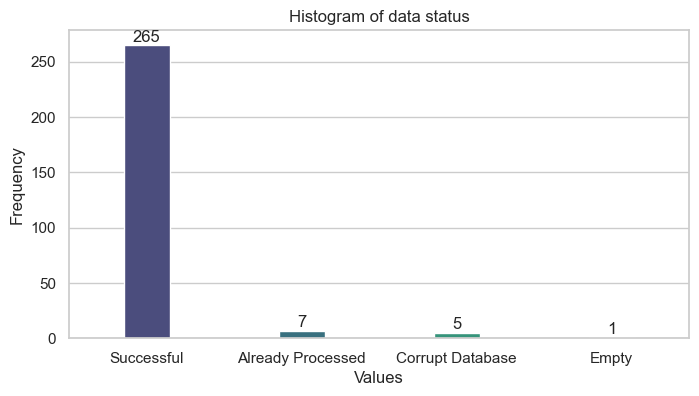

In [36]:
unique_values = final_df['status'].unique()
# Set the style of the seaborn plot
sns.set(style='whitegrid')


# Create a histogram using Seaborn
plt.figure(figsize=(8, 4))


# Count occurrences of each status
status_counts = final_df['status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data = status_counts, x='Status', y='Count', palette='viridis', hue='Status'
            ,  saturation=0.7, capsize=0.1, err_kws={'color': 'gray', 'linewidth':2},  errorbar=None, width=0.3)

# Add labels to the bars
for index, row in status_counts.iterrows():
    plt.text(index, row['Count'] + 0.5, str(row['Count']), ha='center', va='bottom')
    
    
plt.title('Histogram of data status')
plt.xlabel('Values')
plt.ylabel('Frequency')




In [47]:
#check row with empty status 
final_df[final_df['status'] == 'Empty']

,facility_name,db_name,file_size,site_id,status
181,No Site Id,MazoweCitrus26June2024.sql,8.43,,Empty


Data transformations

In [42]:
#reducing the number of decimals in the file size values
final_df['file_size'] = pd.to_numeric(final_df['file_size']).round(2)
final_df.head(3)

,facility_name,db_name,file_size,site_id,status
0,Luveve,Luveve030724.sql,4650.54,ZW090A06,Successful
1,-,Luveve030724.sql,4650.54,ZW090A06,Already Processed
2,Nketa,Nketa020724.sql,4604.29,ZW090A17,Successful


In [45]:
#check unique facility names
final_df['facility_name'].unique()[:10]

array(['Luveve', '-', 'Nketa', 'Northern Suburbs', 'Khami Road Clinic',
       'Magwegwe', 'Mzilikazi', 'Nkulumane', 'Pelandaba', 'Emakhandeni'],
      dtype=object)

In [58]:
#check facility names with length less than 4
final_df[final_df['facility_name'].str.len() < 3]

,facility_name,db_name,file_size,site_id,status
1,-,Luveve030724.sql,4650.54,ZW090A06,Already Processed
27,-,EpworthPoly08Jul24.sql,7373.64,ZW030926,Already Processed
28,-,Overspill08Jul24.sql,4076.49,ZW030927,Already Processed
29,-,Mutawatawa090724.sql,3630.60,ZW03030A,Already Processed
30,-,MurewaHosp10Jul24.sql,2657.55,ZW03070B,Corrupt Database
32,-,Maramba060724.sql,2409.61,ZW030331,Corrupt Database
38,-,Nhakiwa070724.sql,1654.77,ZW030333,Corrupt Database
52,-,Chitimbe070724.sql,1029.96,ZW030328,Corrupt Database
81,-,Dimbiti150724.sql,520.56,ZW030503,Corrupt Database
172,-,Horta-03-July-2024.sql,37.67,ZW020490,Already Processed


In [ ]:
df_modified = final_df[final_df['facility_name'].str.len() > 2]
df_modified.head()

In [59]:
#create a dictionary of facility name and code based on facilities with all details
facilities_dict = dict(zip(df_modified['site_id'] ,df_modified['facility_name']))
facilities_dict

{'ZW090A06': 'Luveve',
 'ZW090A17': 'Nketa',
 'ZW090A18': 'Northern Suburbs',
 'ZW090A05': 'Khami Road Clinic',
 'ZW090A07': 'Magwegwe',
 'ZW090A08': 'Mzilikazi',
 'ZW090A10': 'Nkulumane',
 'ZW090A11': 'Pelandaba',
 'ZW090A01': 'Emakhandeni',
 'ZW090A27': 'Cowdray Park',
 'ZW090A04': 'Entumbane',
 'ZW090A13': 'Pumula',
 'ZW090A03': 'E.F Watson',
 'ZW090A12': 'Princess Margaret',
 'ZW090A09': 'Njube',
 'ZW090A33': 'Maqhawe',
 'ZW090A35': 'Pumula South',
 'ZW090A02': 'Tshabalala',
 'ZW090A14': 'Dr. Shennan',
 'ZW090A0E': 'Thorngrove',
 'ZW090A49': 'CeSHHAR Bulawayo',
 'ZW090A66': 'Mahatshula',
 'ZW090A65': 'Emganwini Satelite Clinic',
 'ZW030926': 'Epworth Polyclinic',
 'ZW030927': 'Overspill Clinic',
 'ZW03030A': 'Mutawatawa',
 'ZW03070B': 'St Pauls Musami',
 'ZW030722': 'Murewa',
 'ZW030325': 'Borera',
 'ZW03090A': 'Beatrice',
 'ZW030562': 'Nyameni',
 'ZW03020A': 'Makumbe',
 'ZW030745': 'Macheke',
 'ZW030391': 'Dindi',
 'ZW030332': 'Mashambanhaka',
 'ZW03090B': 'Kunaka',
 'ZW03070C': '

In [64]:
#copy the original df

facities_df = final_df.copy()
#check facility names with length less than 3
facities_df[facities_df['facility_name'].str.len() < 3]



,facility_name,db_name,file_size,site_id,status
1,-,Luveve030724.sql,4650.54,ZW090A06,Already Processed
27,-,EpworthPoly08Jul24.sql,7373.64,ZW030926,Already Processed
28,-,Overspill08Jul24.sql,4076.49,ZW030927,Already Processed
29,-,Mutawatawa090724.sql,3630.60,ZW03030A,Already Processed
30,-,MurewaHosp10Jul24.sql,2657.55,ZW03070B,Corrupt Database
32,-,Maramba060724.sql,2409.61,ZW030331,Corrupt Database
38,-,Nhakiwa070724.sql,1654.77,ZW030333,Corrupt Database
52,-,Chitimbe070724.sql,1029.96,ZW030328,Corrupt Database
81,-,Dimbiti150724.sql,520.56,ZW030503,Corrupt Database
172,-,Horta-03-July-2024.sql,37.67,ZW020490,Already Processed


In [66]:
# Iterate through the DataFrame and update missing values based on the dictionary
for index, row in facities_df.iterrows():
    if row['facility_name'].strip() == '-' or row['facility_name'].strip()  == '':
        key_value = row['site_id']
        if key_value in facilities_dict:
            facities_df.at[index, 'facility_name'] = facilities_dict[key_value]
            

#check if all rows are updated
unchanged_df = facities_df[facities_df['facility_name'].str.len() < 3]
unchanged_df

,facility_name,db_name,file_size,site_id,status
32,-,Maramba060724.sql,2409.61,ZW030331,Corrupt Database
38,-,Nhakiwa070724.sql,1654.77,ZW030333,Corrupt Database
52,-,Chitimbe070724.sql,1029.96,ZW030328,Corrupt Database
81,-,Dimbiti150724.sql,520.56,ZW030503,Corrupt Database
185,,Mtorashanga8July24.sql,2553.42,ZW04070F,Successful
240,,hebertchitepo25Jun2024.sql,296.16,ZW040794,Successful


6 out of 14 rows not changed


In [68]:
#check if the rows have corresponding values in the dict
for index, row in unchanged_df.iterrows():
    if row['site_id'] in facilities_dict:
        print(facilities_dict[row['site_id']])
    else:
        print('Not found')      

Not found
Not found
Not found
Not found
Not found
Not found


In [82]:
#splitting the file name to extract the date and Facility name

import re



def extract_date(input_string):
    
    # Find the index of the first numerical value
    match = re.search(r'\d', input_string)

    if match:
        index = match.start()
    else:
        index = len(input_string)
        
    return input_string[index:]


def custom_date_parser(date_str):
    day = date_str[:2]
    month_dict = {
        '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
        '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
        '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }
    month = month_dict[date_str[2:4]]
    year = date_str[4:]
    
    return f'{day}{month}{year}'





In [83]:
x = '060724'

print(custom_date_parser(x))

06Jul24


In [79]:
unchanged_df['Date'] = unchanged_df['db_name'].apply(lambda x: extract_date(x))\
                                              .str.replace('.sql', '')
                                              
                                        
                                        
unchanged_df

C:\Users\fkangara\AppData\Local\Temp\ipykernel_49880\2803415674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unchanged_df['Date'] = unchanged_df['db_name'].apply(lambda x: extract_date(x))\


,facility_name,db_name,file_size,site_id,status,Date
32,-,Maramba060724.sql,2409.61,ZW030331,Corrupt Database,060724
38,-,Nhakiwa070724.sql,1654.77,ZW030333,Corrupt Database,070724
52,-,Chitimbe070724.sql,1029.96,ZW030328,Corrupt Database,070724
81,-,Dimbiti150724.sql,520.56,ZW030503,Corrupt Database,150724
185,,Mtorashanga8July24.sql,2553.42,ZW04070F,Successful,8July24
240,,hebertchitepo25Jun2024.sql,296.16,ZW040794,Successful,25Jun2024


In [86]:
# Apply the custom function to the 'Dates' column

for index, row in unchanged_df.iterrows():
    
    try:
        row['Date'] = row['Date'].apply(custom_date_parser)
        
    except:
        pass


unchanged_df

,facility_name,db_name,file_size,site_id,status,Date
32,-,Maramba060724.sql,2409.61,ZW030331,Corrupt Database,060724
38,-,Nhakiwa070724.sql,1654.77,ZW030333,Corrupt Database,070724
52,-,Chitimbe070724.sql,1029.96,ZW030328,Corrupt Database,070724
81,-,Dimbiti150724.sql,520.56,ZW030503,Corrupt Database,150724
185,,Mtorashanga8July24.sql,2553.42,ZW04070F,Successful,8July24
240,,hebertchitepo25Jun2024.sql,296.16,ZW040794,Successful,25Jun2024


In [ ]:
unchanged_df['Date'] = pd.to_datetime(unchanged_df['Date'], format='%d%b%Y', errors='coerce')
unchanged_df